In [1]:
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 

In [2]:
# Simulated data

N = 1000000

observation_day = np.random.choice(range(-10,10), N)
income = np.random.normal(20000, 1000, N)
age = np.random.uniform(60, 70, N)
children = np.random.choice([0,1,2,3,4,5], size=N, p=[0.1, 0.2, 0.3, 0.2, 0.1, 0.1])
district = np.random.choice(["Central", "S", "SW", "W", "NW", "N", "NE", "E", "SE"], size=N)

T = (age > 65) * (observation_day >= 0)

a = 10
b = 40
c = 10
d = 300
g = 2
h = 30
i = 4
e = 0.01

Y0 = income - age * a * children + children * b - c * (children ** 2) + (district == 'Central') * d - 20000 + np.random.normal(0, 50, N)
Y1 = Y0 + (- age * g + np.isin(district, ['S', 'SE']) * h + i * children + e * income)*3 - 500 + np.random.normal(0, 0, N)

Y0 = np.random.binomial(1, expit(Y0/1000))
Y1 = np.random.binomial(1, expit(Y1/1000))

Y = Y0 * (1 - T) + Y1 * T

/home/kalashnov/pymlaas_env/local/lib/python2.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


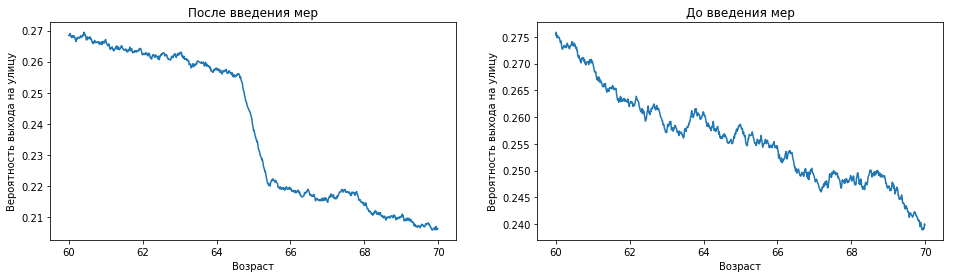

In [3]:
# После введения политики

from sklearn.neighbors import RadiusNeighborsRegressor

model = RadiusNeighborsRegressor(radius=0.4)
model.fit(age[observation_day >= 0, np.newaxis], Y[observation_day >= 0])


fig = plt.figure(figsize=(16, 4))
ax1 = fig.add_subplot(121)
ax1.plot(np.arange(60, 70, 0.01), model.predict(np.arange(60, 70, 0.01)[:, np.newaxis]))

ax1.set_title(u'После введения мер')
ax1.set_xlabel(u"Возраст")
ax1.set_ylabel(u"Вероятность выхода на улицу")

from sklearn.neighbors import RadiusNeighborsRegressor

model = RadiusNeighborsRegressor(radius=0.4)
model.fit(age[observation_day < 0, np.newaxis], Y[observation_day < 0])

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(60, 70, 0.01), model.predict(np.arange(60, 70, 0.01)[:, np.newaxis]))

ax2.set_title(u'До введения мер')
ax2.set_xlabel(u"Возраст")
ax2.set_ylabel(u"Вероятность выхода на улицу")

fig.show()

fig.savefig("regression_discontinuity.png")

In [4]:
# Средний эффект

In [5]:
from catboost import CatBoostRegressor, CatBoostClassifier

X = np.column_stack([income, district, children])[(observation_day > 0) & (age > 62) & (age < 67), :]
Y_tilde = Y[(observation_day > 0) & (age > 62) & (age < 67)]

T_pr = T[(observation_day > 0) & (age > 62) & (age < 67)]

X_train, X_test, Y_train, Y_test, T_train, T_test = train_test_split(X, Y_tilde, T_pr, test_size=0.2)

Y_train = Y_train * T_train - Y_train * (1 - T_train)
dense_model = CatBoostRegressor(iterations=300, l2_leaf_reg=0.5).fit(X_train, Y_train, cat_features=[1])
dense_model2 = CatBoostClassifier(iterations=300, l2_leaf_reg=0.5).fit(X_train[T_train == 1, :], Y_train[T_train == 1], cat_features=[1])



0:	learn: 0.4885054	total: 83.2ms	remaining: 24.9s
1:	learn: 0.4883905	total: 114ms	remaining: 16.9s
2:	learn: 0.4882749	total: 138ms	remaining: 13.7s
3:	learn: 0.4881856	total: 158ms	remaining: 11.7s
4:	learn: 0.4880862	total: 182ms	remaining: 10.8s
5:	learn: 0.4879957	total: 207ms	remaining: 10.1s
6:	learn: 0.4879176	total: 229ms	remaining: 9.56s
7:	learn: 0.4878337	total: 248ms	remaining: 9.05s
8:	learn: 0.4877523	total: 273ms	remaining: 8.82s
9:	learn: 0.4876779	total: 298ms	remaining: 8.63s
10:	learn: 0.4876081	total: 323ms	remaining: 8.5s
11:	learn: 0.4875456	total: 347ms	remaining: 8.32s
12:	learn: 0.4874949	total: 366ms	remaining: 8.07s
13:	learn: 0.4874404	total: 396ms	remaining: 8.08s
14:	learn: 0.4873830	total: 420ms	remaining: 7.98s
15:	learn: 0.4873294	total: 449ms	remaining: 7.96s
16:	learn: 0.4872753	total: 486ms	remaining: 8.1s
17:	learn: 0.4872268	total: 511ms	remaining: 8.01s
18:	learn: 0.4871867	total: 534ms	remaining: 7.9s
19:	learn: 0.4871551	total: 547ms	remaining

170:	learn: 0.4861749	total: 3s	remaining: 2.27s
171:	learn: 0.4861749	total: 3.01s	remaining: 2.24s
172:	learn: 0.4861748	total: 3.02s	remaining: 2.22s
173:	learn: 0.4861745	total: 3.04s	remaining: 2.2s
174:	learn: 0.4861744	total: 3.05s	remaining: 2.18s
175:	learn: 0.4861730	total: 3.08s	remaining: 2.17s
176:	learn: 0.4861730	total: 3.08s	remaining: 2.14s
177:	learn: 0.4861730	total: 3.1s	remaining: 2.12s
178:	learn: 0.4861718	total: 3.12s	remaining: 2.1s
179:	learn: 0.4861717	total: 3.13s	remaining: 2.08s
180:	learn: 0.4861716	total: 3.14s	remaining: 2.06s
181:	learn: 0.4861709	total: 3.15s	remaining: 2.04s
182:	learn: 0.4861707	total: 3.17s	remaining: 2.02s
183:	learn: 0.4861706	total: 3.17s	remaining: 2s
184:	learn: 0.4861703	total: 3.19s	remaining: 1.98s
185:	learn: 0.4861697	total: 3.21s	remaining: 1.96s
186:	learn: 0.4861692	total: 3.23s	remaining: 1.95s
187:	learn: 0.4861683	total: 3.24s	remaining: 1.93s
188:	learn: 0.4861676	total: 3.25s	remaining: 1.91s
189:	learn: 0.4861645

36:	learn: 0.4432271	total: 884ms	remaining: 6.28s
37:	learn: 0.4418523	total: 905ms	remaining: 6.24s
38:	learn: 0.4407603	total: 924ms	remaining: 6.19s
39:	learn: 0.4395587	total: 943ms	remaining: 6.13s
40:	learn: 0.4384184	total: 962ms	remaining: 6.08s
41:	learn: 0.4373139	total: 980ms	remaining: 6.02s
42:	learn: 0.4362461	total: 1s	remaining: 5.98s
43:	learn: 0.4354788	total: 1.01s	remaining: 5.91s
44:	learn: 0.4345244	total: 1.03s	remaining: 5.87s
45:	learn: 0.4337460	total: 1.06s	remaining: 5.87s
46:	learn: 0.4330197	total: 1.09s	remaining: 5.89s
47:	learn: 0.4322674	total: 1.12s	remaining: 5.86s
48:	learn: 0.4315538	total: 1.14s	remaining: 5.85s
49:	learn: 0.4308711	total: 1.16s	remaining: 5.82s
50:	learn: 0.4303025	total: 1.19s	remaining: 5.79s
51:	learn: 0.4297432	total: 1.21s	remaining: 5.76s
52:	learn: 0.4292415	total: 1.23s	remaining: 5.75s
53:	learn: 0.4287349	total: 1.26s	remaining: 5.73s
54:	learn: 0.4282638	total: 1.28s	remaining: 5.71s
55:	learn: 0.4278794	total: 1.3s	r

197:	learn: 0.4187137	total: 4.46s	remaining: 2.3s
198:	learn: 0.4187127	total: 4.47s	remaining: 2.27s
199:	learn: 0.4187102	total: 4.49s	remaining: 2.24s
200:	learn: 0.4187102	total: 4.5s	remaining: 2.22s
201:	learn: 0.4187071	total: 4.52s	remaining: 2.19s
202:	learn: 0.4186978	total: 4.54s	remaining: 2.17s
203:	learn: 0.4186926	total: 4.56s	remaining: 2.14s
204:	learn: 0.4186926	total: 4.57s	remaining: 2.12s
205:	learn: 0.4186705	total: 4.59s	remaining: 2.1s
206:	learn: 0.4186559	total: 4.61s	remaining: 2.07s
207:	learn: 0.4186537	total: 4.63s	remaining: 2.05s
208:	learn: 0.4186367	total: 4.65s	remaining: 2.02s
209:	learn: 0.4186248	total: 4.67s	remaining: 2s
210:	learn: 0.4186189	total: 4.69s	remaining: 1.98s
211:	learn: 0.4186130	total: 4.71s	remaining: 1.95s
212:	learn: 0.4186103	total: 4.72s	remaining: 1.93s
213:	learn: 0.4185982	total: 4.74s	remaining: 1.9s
214:	learn: 0.4185966	total: 4.75s	remaining: 1.88s
215:	learn: 0.4185910	total: 4.77s	remaining: 1.86s
216:	learn: 0.41857

In [ ]:
from zoo.utils.uplift.evaluation import bootstraped_efficiency_curve

score = dense_model.predict(X_test)/dense_model2.predict_proba(X_test)[:, 0]
Y_true = np.column_stack([(1-Y_test) * 2000 * T_test, -Y_test])

# ЕДИНИЦА МИНУС!

cum, th = bootstraped_efficiency_curve(Y_true, score, T_test)


fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
ax1.plot(cum[:, 0], cum[:, 1])
ax1.plot([cum[0, 0], cum[-1, 0]], [cum[0, 1], cum[-1, 1]], linestyle='--', color='k')
ax1.set_xlabel(u'Траты бюжета в расчете на пенсионера')
ax1.set_ylabel(u'Увеличение доли пенсионеров, которые остаются дома')

fig.savefig("uplift.png")
plt.show()